In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [58]:
df.shape

(768, 9)

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
x=df.iloc[:,:-1]

In [62]:
y=df.iloc[:,-1]

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_s=sc.fit_transform(x)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_s,y, test_size=0.2, random_state=42)

In [65]:
from keras.models import Sequential
from keras import layers

In [66]:
input_dim=x_train.shape[1]

model=Sequential()
model.add(layers.Dense(4,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(3,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,input_dim=input_dim,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'],)

####1
'''
import tensorflow as tf
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),
                                                                   tf.keras.metrics.recall()],)
'''

In [73]:
model.fit(x_train,y_train,epochs=165,verbose=2,batch_size=30)

Epoch 1/165
21/21 - 0s - loss: 0.4190 - accuracy: 0.7834 - 36ms/epoch - 2ms/step
Epoch 2/165
21/21 - 0s - loss: 0.4189 - accuracy: 0.7834 - 30ms/epoch - 1ms/step
Epoch 3/165
21/21 - 0s - loss: 0.4189 - accuracy: 0.7834 - 37ms/epoch - 2ms/step
Epoch 4/165
21/21 - 0s - loss: 0.4189 - accuracy: 0.7834 - 32ms/epoch - 2ms/step
Epoch 5/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7834 - 32ms/epoch - 2ms/step
Epoch 6/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7834 - 31ms/epoch - 1ms/step
Epoch 7/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7850 - 32ms/epoch - 2ms/step
Epoch 8/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7834 - 31ms/epoch - 1ms/step
Epoch 9/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7834 - 35ms/epoch - 2ms/step
Epoch 10/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7834 - 41ms/epoch - 2ms/step
Epoch 11/165
21/21 - 0s - loss: 0.4188 - accuracy: 0.7818 - 34ms/epoch - 2ms/step
Epoch 12/165
21/21 - 0s - loss: 0.4189 - accuracy: 0.7818 - 34ms/epoch - 2ms/step
Epoch 13/165
21/21 - 0s -

In [75]:
###evaluate test data

loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print('loss = ',loss)
print('acc = ',accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7208
loss =  0.603560209274292
acc =  0.7207792401313782


In [76]:
#### another way use sklearn

In [77]:
y_pre=model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [88]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pre.round())
print('confussion metrix : \n',cm)
print('===============================')
acc=metrics.accuracy_score(y_test,y_pre.round())
print('cacc score: ',acc)
print('================================')
rec=metrics.recall_score(y_test,y_pre.round())
print('recall score: ',rec)
print('================================')
pre=metrics.precision_score(y_test,y_pre.round())
print('pression score: ',pre)
print('================================')

confussion metrix : 
 [[75 24]
 [19 36]]
cacc score:  0.7207792207792207
recall score:  0.6545454545454545
pression score:  0.6


<Axes: >

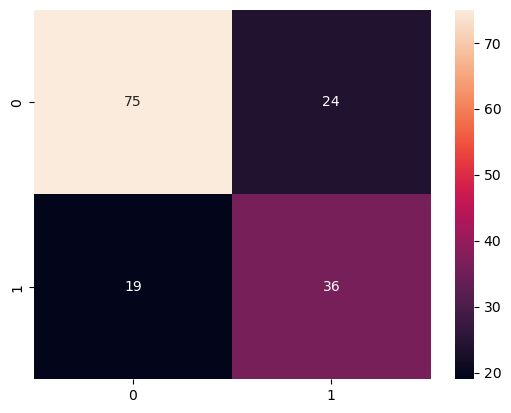

In [94]:
sns.heatmap(cm,annot=True)